In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [13]:
features = ["current_player_score",
            "opponent_score",
            "current_player_deadwood",
            "current_player_num_hit_cards",
            # alpha to here                 features[:4]
            "num_melds",
            "point_sum_melds",
            "num_combos",
            "point_sum_combos",
            "num_knock_cache",
            "point_sum_knock_cache",
            "num_load_cards",
            "point_sum_load_cards",
            "turns_taken"
            # beta to here                 features[:13]
           ]

In [159]:
df = pd.read_csv('beta-2.csv')
df

,current_player,is_current_player_hand_winner,is_current_player_game_winner,current_player_score,opponent_score,current_player_deadwood,current_player_num_hit_cards,num_melds,point_sum_melds,num_combos,point_sum_combos,num_knock_cache,point_sum_knock_cache,num_load_cards,point_sum_load_cards,turns_taken
0,1.0,1,0,0.0,0.0,45.0,1.0,1.0,18.0,0.0,0.0,3.0,5.0,4.0,34.0,0.0
1,0.0,0,1,0.0,0.0,68.0,6.0,0.0,0.0,3.0,27.0,3.0,5.0,5.0,36.0,0.0
2,1.0,1,0,0.0,0.0,45.0,1.0,1.0,18.0,0.0,0.0,3.0,5.0,4.0,34.0,0.0
3,0.0,0,1,0.0,0.0,68.0,6.0,0.0,0.0,3.0,27.0,3.0,5.0,5.0,36.0,0.0
4,1.0,1,0,0.0,0.0,40.0,1.0,1.0,18.0,0.0,0.0,3.0,5.0,4.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,1.0,0,0,66.0,98.0,45.0,5.0,1.0,24.0,2.0,13.0,3.0,7.0,3.0,26.0,3.0
7890,0.0,1,1,98.0,66.0,21.0,11.0,1.0,21.0,5.0,20.0,4.0,4.0,1.0,4.0,3.0
7891,1.0,0,0,66.0,98.0,35.0,5.0,1.0,32.0,2.0,13.0,3.0,7.0,2.0,16.0,4.0
7892,0.0,1,1,98.0,66.0,21.0,11.0,1.0,21.0,5.0,20.0,4.0,4.0,1.0,4.0,4.0


In [160]:
np.set_printoptions(edgeitems = 200, linewidth = 150)
df.values[0:20]

array([[ 1.,  1.,  0.,  0.,  0., 45.,  1.,  1., 18.,  0.,  0.,  3.,  5.,  4., 34.,  0.],
       [ 0.,  0.,  1.,  0.,  0., 68.,  6.,  0.,  0.,  3., 27.,  3.,  5.,  5., 36.,  0.],
       [ 1.,  1.,  0.,  0.,  0., 45.,  1.,  1., 18.,  0.,  0.,  3.,  5.,  4., 34.,  0.],
       [ 0.,  0.,  1.,  0.,  0., 68.,  6.,  0.,  0.,  3., 27.,  3.,  5.,  5., 36.,  0.],
       [ 1.,  1.,  0.,  0.,  0., 40.,  1.,  1., 18.,  0.,  0.,  3.,  5.,  4., 29.,  1.],
       [ 0.,  0.,  1.,  0.,  0., 39.,  6.,  1., 27.,  2.,  7.,  3.,  5.,  4., 28.,  1.],
       [ 1.,  1.,  0.,  0.,  0., 33.,  5.,  1., 18.,  2.,  9.,  3.,  4.,  3., 19.,  2.],
       [ 0.,  0.,  1.,  0.,  0., 37.,  7.,  1., 27.,  3., 21.,  3.,  5.,  2., 11.,  2.],
       [ 1.,  1.,  0.,  0.,  0., 17.,  5.,  2., 24.,  0.,  0.,  3.,  6.,  1.,  7.,  3.],
       [ 0.,  0.,  1.,  0.,  0., 34.,  5.,  1., 27.,  2.,  7.,  3.,  5.,  4., 22.,  3.],
       [ 1.,  1.,  0.,  0.,  0., 13.,  5.,  2., 24.,  0.,  0.,  3.,  5.,  1.,  4.,  4.],
       [ 1.,  1.,  0.

CSV LINE:

0.5730919993,0.0059272640,-0.0058971003,-0.0012975392,-0.0029694906


R^2:   0.13010532723448176 




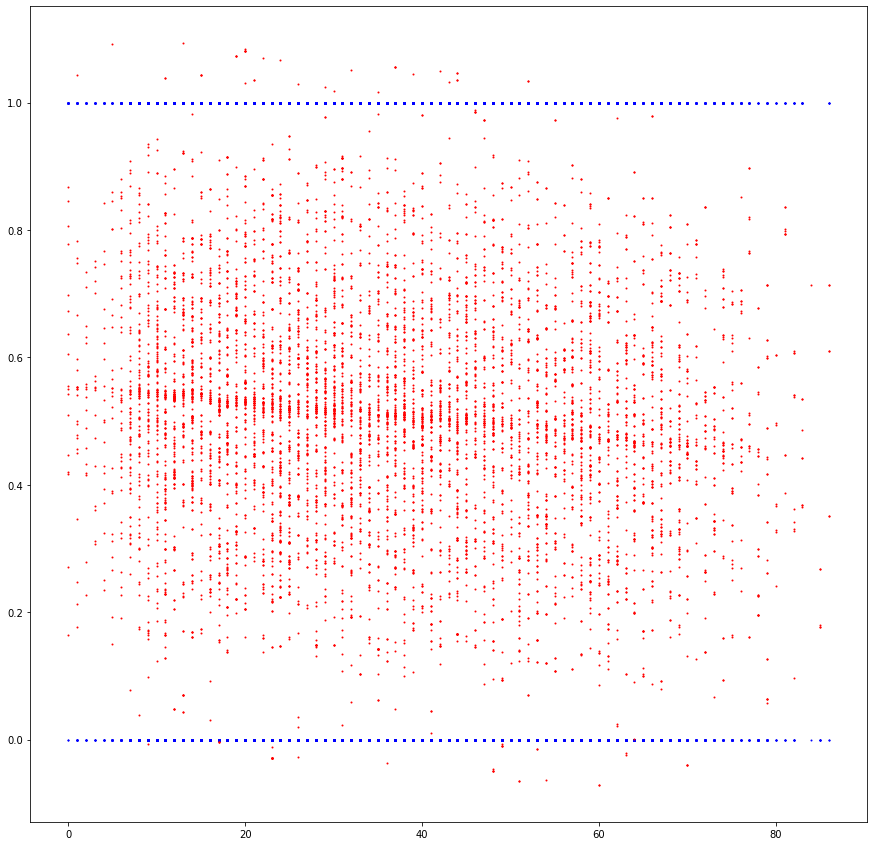

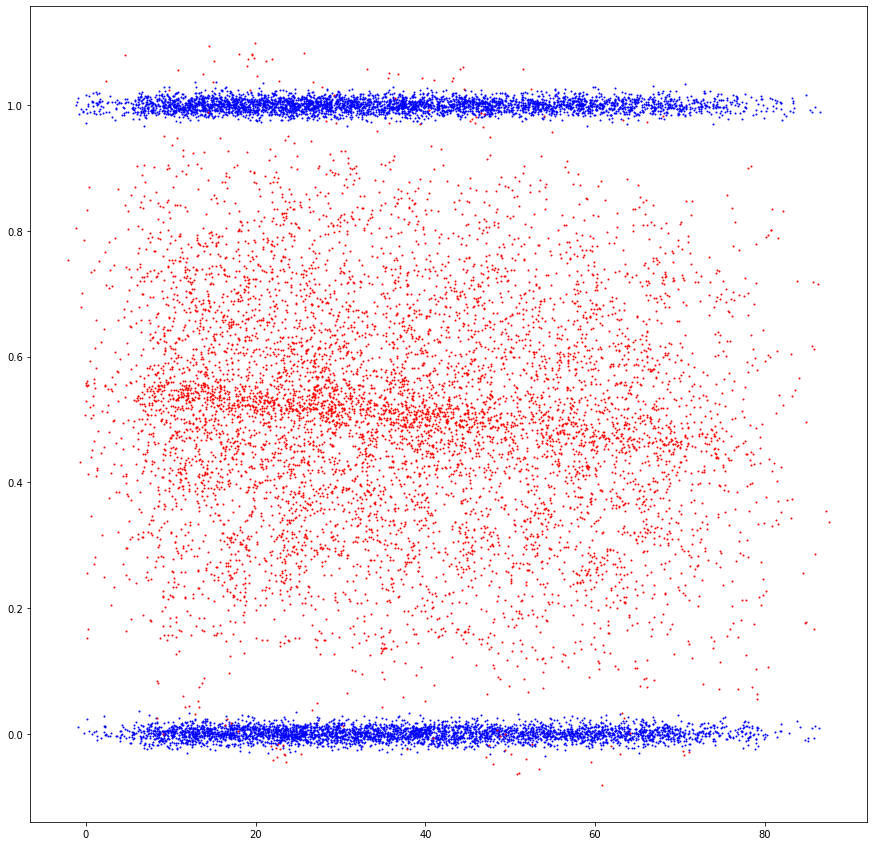

In [163]:
X = df[features[:4]]
y = df[["is_current_player_game_winner"]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
print(",".join('{0:.10f}'.format(num) for num in np.hstack((linear_regressor.intercept_,linear_regressor.coef_[0]))) + "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)



fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X[['current_player_deadwood']], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

# logistic

In [22]:
X = df[["current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards","num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"]]
y = df[["is_current_player_game_winner"]]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
model = LogisticRegression().fit(X_train, y_train.values.T[0])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
predictions = model.predict(X_test)

In [19]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

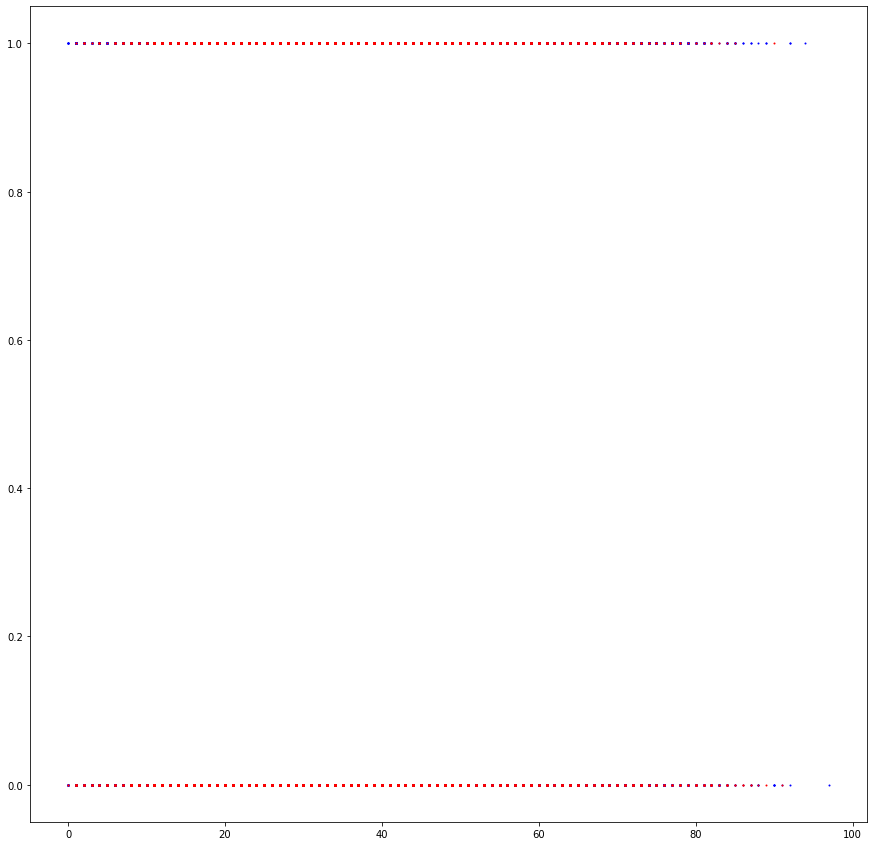

In [20]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

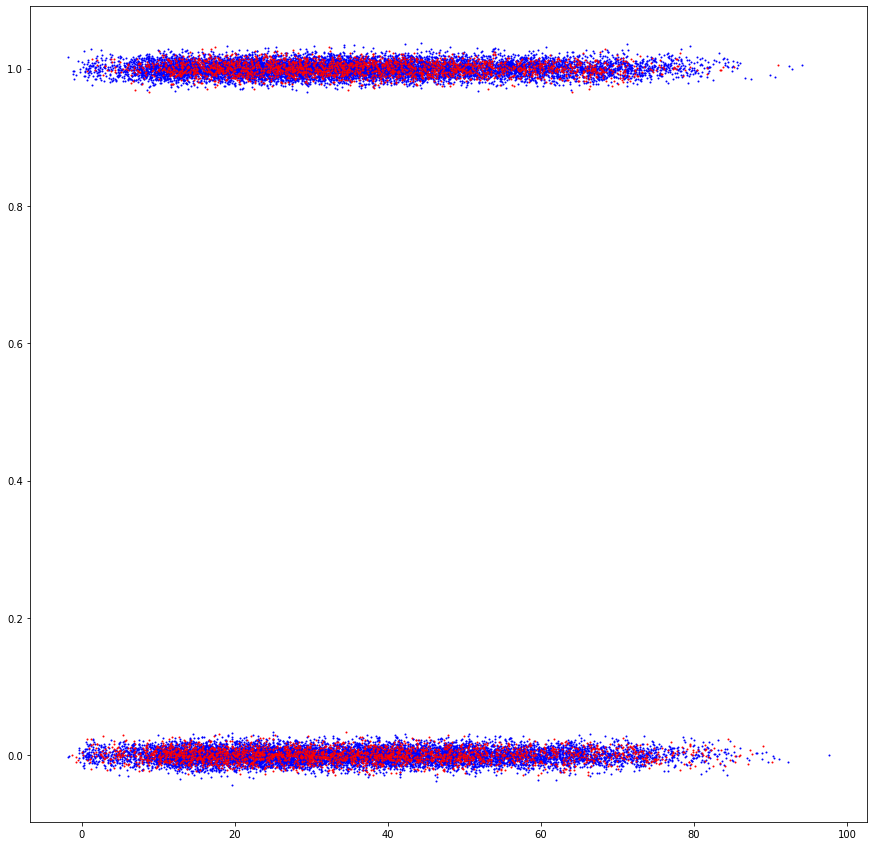

In [21]:
fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()